# Linear Regression Exercise

This exercise will guide you in implementing the Linear Regression Model to gain intuitions and develop a deeper understanding of the model. These concepts will form as the foundation for more complex models later on.

**You will learn to:**
- Build the general architecture of a Linear Regression Model.
    - Implement the analytical solution for the parameters that minimizes the loss function
    - Implement the approximate/iterative solution for finding the parameters that minimizes the loss function
        - Initializing parameters
        - Calculating the cost/loss/objective Function
        - Computing for the gradients of the loss function with respect to the parameters
        - Implement gradient descent to update the paramters
    - Implement linear regression using sci-kit learn

## Instructions for All Labs
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Some markdown cells contain questions.
  * For questions <span style="color:red;">colored in red</span>, you must submit your answers in the corresponding Assignment in the course page. Make sure that you enter your responses in the item with the matching question code. Answers that do not follow the prescribed format will automatically be marked wrong by the checker.
  * For questions <span style="color:green;">colored in green</span>, you don't have to submit your answers, but you must think about these questions as they will help enrich your understanding of the concepts covered in the labs.
* You are expected to search how to some functions work on the Internet or via the docs.
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You may not reproduce this notebook or share them to anyone.

## Import
Import **matplotlib**, **numpy**, **csv**, and **math**.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv
import math

# set default size of plots
plt.rcParams['figure.figsize'] = (6.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

## Synthetic Datasets
Before we use a more complicated dataset, we will first demonstrate linear regression using a synthetic (artificial) data drawn from a normal distribution. The synthetic dataset is composed of an input feature `X` and a target variable `y` for easy visualization in a plot. The dataset contains 20 data points.

In [2]:
np.random.seed(1)

X = np.arange(start=0, stop=20, step=1)
delta = np.random.normal(loc=100, scale=0, size=20)
y = X + delta

data = np.column_stack([X, y])
data

array([[  0., 100.],
       [  1., 101.],
       [  2., 102.],
       [  3., 103.],
       [  4., 104.],
       [  5., 105.],
       [  6., 106.],
       [  7., 107.],
       [  8., 108.],
       [  9., 109.],
       [ 10., 110.],
       [ 11., 111.],
       [ 12., 112.],
       [ 13., 113.],
       [ 14., 114.],
       [ 15., 115.],
       [ 16., 116.],
       [ 17., 117.],
       [ 18., 118.],
       [ 19., 119.]])

Let's visualize the synthetic dataset in a 2D graph.

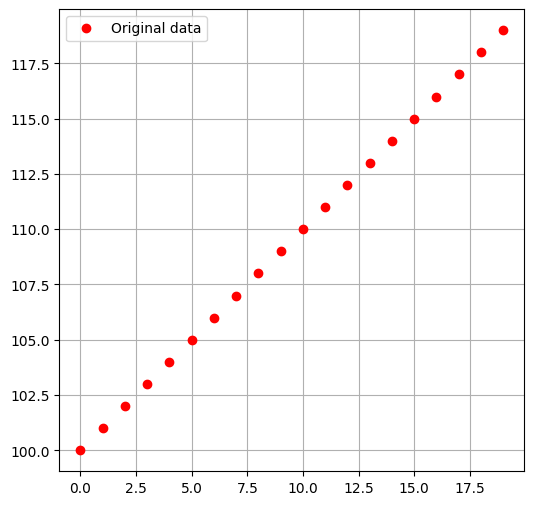

In [3]:
fig, ax = plt.subplots()
ax.plot(X, y, 'ro', label='Original data')
ax.legend()
plt.grid()
plt.show()

<span style="color:red;">**Question 2-1**: Describe the plot of the generated data. How is `X` related to `y`?</span>

## Linear Regression on Synthetic Dataset 1 using Analytical Solution
Open `linear_regression.py` file. Some of the functions in the `AnalyticalMethod` class are not yet implemented. We will implement the missing parts of this class.

Import the `AnalyticalMethod` class and the `compute_RMSE()` function.

In [4]:
from linear_regression import AnalyticalMethod, compute_RMSE

Instantiate an `AnalyticalMethod` object. Assign the object to variable `analytical_method`.

In [5]:
# Write your code here
analytical_method = AnalyticalMethod()

### Analytical Solution / Closed Form / Normal Equation

We can quickly compute for the weights by getting the derivative of our objective function and equating it to 0. However, there are some drawbacks to this method, as you would see in the following cells.

The next cells show the step-by-step process of implementing the closed form solution of linear regression:
1. Adding the bias in the weight vector `W`.
1. Finding for the optimal values of weight vector `W` by using the closed form solution.
3. Do some predictions! Now that we have the weights, the label can be solved by plugging in the features `X` into the linear model.

### Step 1. Pre-processing.  Add in a vector of one to X to account for the bias.

Open `linear_regression.py` file and complete the `feature_transform()` function in the `AnalyticalMethod` class. This function appends a vector of ones to `X` to account for the bias term.

Implement the `feature_transform()` function  in the `AnalyticalMethod` class. Inline comments should help you in completing the contents of the function.

Transform `X` by calling the function `feature_transform()` and assign the return value to variable `transformed_X`.

In [17]:
# Write your code here
transformed_X = analytical_method.feature_transform(X)

In [18]:
print(transformed_X.shape)

(20, 2)


__Sanity check:__

Your result should have a shape of (20, 2)

### Step 2. Train. Compute for the weights via the analytical solution.

Open `linear_regression.py` file and complete the `compute_weights()` function in the `AnalyticalMethod` class. This function computes the weights based on the analytical solution without regularization.

$$W=(X^TX)^{-1}X^Ty$$

This function has 2 parameters - `X` and `y`, where `X` is an `np.ndarray` of shape (N, D) containing the training data and `y` is an `np.ndarray` of shape (N, 1) containing the ground truth values.

Implement the `compute_weights()` function in the `AnalyticalMethod` class. Inline comments should help you in completing the contents of the function.

Compute the weights by calling the function `compute_weights()` and assign the return value to variable `W`.

In [19]:
# Write your code here
W = analytical_method.compute_weights(X, y)

In [20]:
print(W)

[100.   1.]


### Step 3: Test. Predict test data with the computed weights

Open `linear_regression.py` file and complete the `predict()` function in the `AnalyticalMethod` class. This function predicts values for the test data.

Implement the `predict()` function in the `AnalyticalMethod` class. Inline comments should help you in completing the contents of the function.

Get the predicted `y` values given the synthetic data and assign the return value to variable `y_predicted`.

In [22]:
# Write your code here
y_predicted = analytical_method.predict(X)

Let's plot synthetic dataset 1 and the regression line.

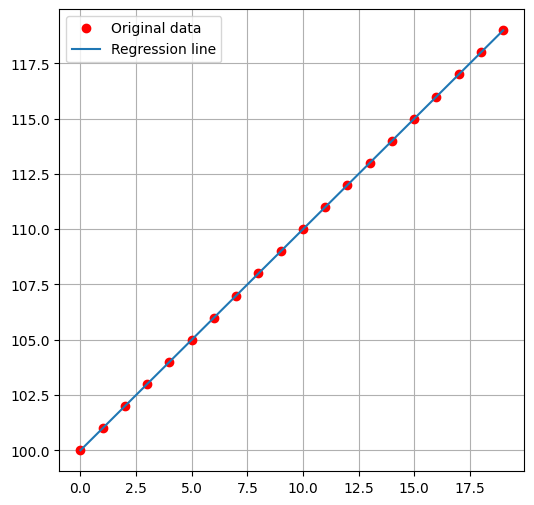

In [23]:
fig, ax = plt.subplots()
ax.plot(X, y, 'ro', label='Original data')

ax.plot(X, y_predicted, label='Regression line')

ax.legend()
plt.grid()
plt.show()

<span style="color:red;">**Question 2-2**: Describe the regression line with respect to the original data.</span>


Compute the predicted `y` value when X is 25 by calling the function `predict()` and assign the return value to variable `y_pred_analytical`.

In [26]:
# Write your code here
X_test = np.array([[25]])
y_pred_analytical = analytical_method.predict(X_test)

In [27]:
print(np.around(y_pred_analytical.flatten(), 2))

[125.]


<span style="color:red;">**Question 2-3**: What is the predicted `y` value when `X` is 25? Limit to 2 decimal places.</span>

Let's compare the ground truth `y` values with the predicted `y` values.

In [28]:
print('\nGround truth y values\n', y)
print('Predicted y values\n', y_predicted)


Ground truth y values
 [100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113.
 114. 115. 116. 117. 118. 119.]
Predicted y values
 [100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113.
 114. 115. 116. 117. 118. 119.]


<span style="color:red;">**Question 2-4**: Describe the ground truth `y` values and the predicted `y` values. What can you say about the difference in their values?</span>

### Evaluate using Root Mean Squared Error (RMSE)

Is there a objective way of saying if the model is doing well or not?

This is called regression metrics, and we're going to try out one now called **root mean squared error** or **RMSE**.

$$
\operatorname{RMSE}(\hat{y}) = \sqrt{\operatorname{MSE}(\hat{y})} = \sqrt{\operatorname{M}((\hat{y}-y)^2)}
$$

$\hat{y}$ stands for predicted labels, while $y$ stands for the ground truth label

Computing it can be summarized in 4 simple steps:
1. Have a test data ready with known labels. Ideally, these data have never been used in training, but we're going to suspend that rule first and try it with our dataset.
2. Get the prediction for every test data, and **subtract** this estimate with the ground truth, and **square** the difference.
3. Get the **average** of all the squared differences (#2) of every test data.
4. Get the **square root** of the value from #3.

Open `linear_regression.py` file and complete the `compute_RMSE()` function. This function computes the Root Mean Squared Error (RMSE) given the ground truth values and the predicted values.

Implement the `compute_RMSE()` function. Inline comments should help you in completing the contents of the function.

To check our implementation, let's compute the RMSE of the two `np.ndarray` with the same values. This should yield an RMSE of 0.0.

In [31]:
y_sample_true = np.arange(start=0, stop=20, step=1)
y_sample_pred = np.arange(start=0, stop=20, step=1)

rmse = compute_RMSE(y_sample_true, y_sample_pred)
print('{:.2f}'.format(rmse))

0.00


Compute the RMSE of our model by calling the function `compute_RMSE()` and assign the return value to variable `rmse`.

In [34]:
# Write your code here
rmse = compute_RMSE(y, y_predicted)

In [35]:
print('{:.2f}'.format(rmse))

0.00


<span style="color:red;">**Question 2-5:** Can we say that our model fits the input data well?</span>

## Linear Regression on Synthetic Dataset 2 using Analytical Solution

Let's create another synthetic dataset drawn from a normal distribution. The synthetic dataset is still composed of an input feature `x` and a target variable `y` for easy visualization in a plot. The dataset contains 40 data points.

In [70]:
np.random.seed(2)

X2 = np.arange(start=0, stop=20, step=0.5)
delta = np.random.normal(loc=100, scale=3, size=40)
y2 = X2 + delta

data = np.column_stack([X2, y2])
data

array([[  0.        ,  98.74972646],
       [  0.5       , 100.33119952],
       [  1.        ,  94.59141171],
       [  1.5       , 106.42081243],
       [  2.        ,  96.61969324],
       [  2.5       ,  99.9747579 ],
       [  3.        , 104.50864425],
       [  3.5       ,  99.76413574],
       [  4.        , 100.82614334],
       [  4.5       , 101.77297716],
       [  5.        , 106.65436213],
       [  5.5       , 112.37662404],
       [  6.        , 106.12461818],
       [  6.5       , 103.14622366],
       [  7.        , 108.61717496],
       [  7.5       , 105.7115209 ],
       [  8.        , 107.94260851],
       [  8.5       , 112.02500366],
       [  9.        , 106.75638715],
       [  9.5       , 109.52707575],
       [ 10.        , 107.36567632],
       [ 10.5       , 110.03069749],
       [ 11.        , 111.76971136],
       [ 11.5       , 108.53366285],
       [ 12.        , 110.9835341 ],
       [ 12.5       , 111.79144791],
       [ 13.        , 111.08703496],
 

Let's visualize the synthetic dataset in a 2D graph.

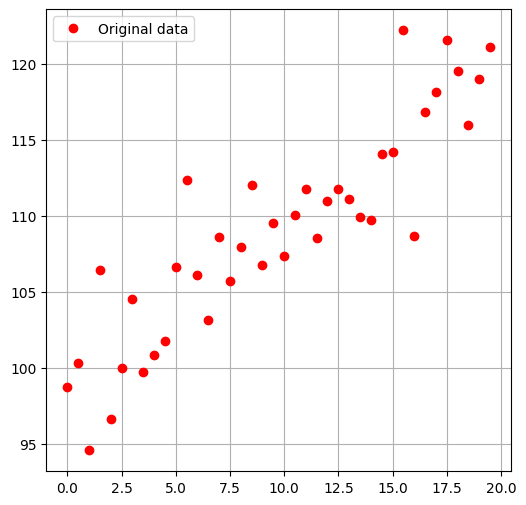

In [71]:
fig, ax = plt.subplots()
ax.plot(X2, y2, 'ro', label='Original data')
ax.legend()
plt.grid()
plt.show()

### Train and Test

Get the predicted `y` values given the new synthetic data and assign the return value to variable `y_predicted`.

In [72]:
# Write your code here
X2 = X2.reshape(-1, 1)
analytical_method = AnalyticalMethod()
W = analytical_method.compute_weights(X2, y2.reshape(-1, 1))
y_predicted = analytical_method.predict(X2)

Display the result in a 2D graph.

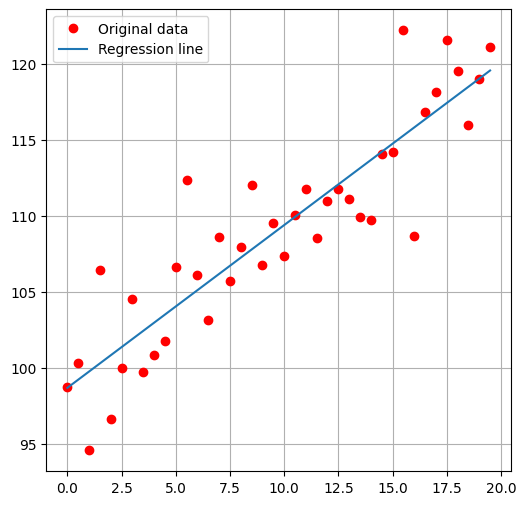

In [73]:
fig, ax = plt.subplots()
ax.plot(X2, y2, 'ro', label='Original data')

ax.plot(X2, y_predicted, label='Regression line')

ax.legend()
plt.grid()
plt.show()

<span style="color:green;">**Question**: Describe the regression line with respect to the original data. Is it in the middle of the data points? Is it away from the data points?</span>

Let's compare the ground truth `y` values with the predicted `y` values.

In [74]:
print('\nGround truth y values\n', y2)
print('Predicted y values\n', y_predicted)


Ground truth y values
 [ 98.74972646 100.33119952  94.59141171 106.42081243  96.61969324
  99.9747579  104.50864425  99.76413574 100.82614334 101.77297716
 106.65436213 112.37662404 106.12461818 103.14622366 108.61717496
 105.7115209  107.94260851 112.02500366 106.75638715 109.52707575
 107.36567632 110.03069749 111.76971136 108.53366285 110.9835341
 111.79144791 111.08703496 109.93716314 109.73634832 114.03951441
 114.19282912 122.19410037 108.69569727 116.83817951 118.11133361
 121.57890159 119.50557162 115.96735889 119.00002928 121.12705772]
Predicted y values
 [[ 98.69575936]
 [ 99.23049856]
 [ 99.76523776]
 [100.29997696]
 [100.83471616]
 [101.36945536]
 [101.90419456]
 [102.43893376]
 [102.97367296]
 [103.50841216]
 [104.04315136]
 [104.57789056]
 [105.11262976]
 [105.64736896]
 [106.18210816]
 [106.71684736]
 [107.25158656]
 [107.78632576]
 [108.32106496]
 [108.85580416]
 [109.39054336]
 [109.92528256]
 [110.46002176]
 [110.99476096]
 [111.52950016]
 [112.06423936]
 [112.598978

<span style="color:red;">**Question 1-6**: Describe the ground truth `y` values and the predicted `y` values. What can you say about the difference in their values?</span>

### Evaluate using Root Mean Squared Error (RMSE)

Compute the RMSE of our model and assign the return value to variable `rmse`.

In [75]:
# Write your code here
rmse = compute_RMSE(y2.reshape(-1, 1), y_predicted)

In [76]:
print('{:.2f}'.format(rmse))

3.08


<span style="color:red;">**Question 1-7**: Can we say that our model fits the input data well?</span>

## Kansas City Dataset
We will use the sales prices of houses in Kansas City as our dataset. We will only get one feature / dimension / variable, i.e., living area, to be able to visualize the dataset in a 2D plane.

### Data Preprocessing
Let's load the data into the notebook. This data has already been processed, which means that the data is already ready to go for training.

But in reality, you will need to perform some pre-processing and feature extractions after collecting data. For starters, you have to make sure that there are no erroneous answers (e.g., instead of a number under the column living area, 'big' was entered) or empty fields. You may also want to get the sum, average, or standard deviation of some data.

Again, our data here is already clean so we don't have to worry about that :)

In [77]:
with open('house.csv', 'r') as csv_file:
    raw_data = csv.reader(csv_file)
    next(csv_file)
    X_kansas = np.empty((0, 1), int)
    y_kansas = np.empty((0, 1), int)
    for row in raw_data:
        X_kansas = np.vstack([X_kansas, np.array([int(row[3])])])  # column for living area
        y_kansas = np.append(y_kansas, np.array([int(row[7])]))    # column for price

y_house = np.expand_dims(y_kansas, 1)

print('Training data shape:', X_kansas.shape)
print('Ground truth values shape:', y_kansas.shape)

Training data shape: (128, 1)
Ground truth values shape: (128,)


Let's visualize the Kansas City dataset in a 2D graph.

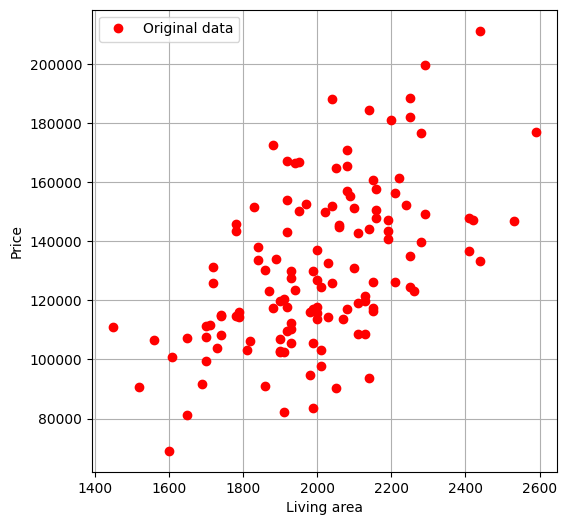

In [78]:
fig, ax = plt.subplots()
ax.plot(X_kansas, y_kansas, 'ro', label='Original data')

plt.ylabel('Price')
plt.xlabel('Living area')
ax.legend()
plt.grid()
plt.show()

## Linear Regression on the Kansas City Dataset using Analytical Solution

Create a linear regression model on the Kansas City dataset using the analytical solution.

### Step 1: Train. Compute for the weights via the analytical solution.


Compute the weights using the Kansas City dataset by calling the function `compute_weights()` and assign the return value to variable `W`.

In [79]:
# Write your code here
W = analytical_method.compute_weights(X_kansas, y_kansas)

Display weights.

In [80]:
print('{:.2f}'.format(float(W[0])), '{:.2f}'.format(float(W[1])))

-10091.13 70.23


<span style="color:red;">**Question 1-8**: What is the value of the first weight? Limit to 2 decimal places.</span>

<span style="color:red;">**Question 1-9**: Why are there are 2 weights if we only have 1 feature? Where did the 2nd one come from?</span>

### Step 2: Test. Predict test data with the weights computed

Get the predicted `y` values given the Kansas City dataset and using the `AnalyticalMethod` and assign the return value to variable `y_predicted`.

In [81]:
# Write your code here
y_predicted = analytical_method.predict(X_kansas)

Display the result in a 2D graph.

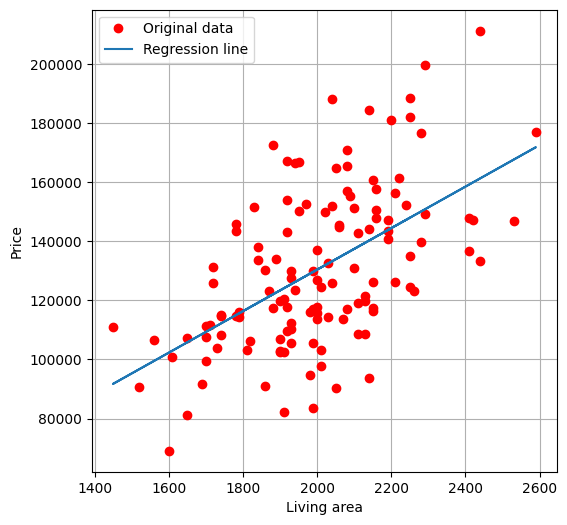

In [82]:
fig, ax1 = plt.subplots()
ax1.plot(X_kansas, y_kansas, 'ro', label='Original data')
line1, = ax1.plot(X_kansas, y_predicted, label='Regression line')

plt.ylabel('Price')
plt.xlabel('Living area')
ax1.legend()
plt.grid()
plt.show()

<span style="color:green;">**Question**: Describe the regression line with respect to the original data. Is it in the middle of the data points? Is it away from the data points?</span>

### Evaluate using Root Mean Squared Error (RMSE)

Compute the RMSE of our model and assign the return value to variable `rmse`.

In [83]:
# Write your code here
rmse = compute_RMSE(y_kansas, y_predicted)

In [84]:
print('{:.2f}'.format(rmse))

22299.25


<span style="color:red;">**Question 1-10**: What is the RMSE of our model? Limit to 2 decimal places.</span>

## Linear Regression on the Kansas City Dataset using `np.polyfit`
Use `np.polyfit` to get a similar result.

Import the `PolyFitMethod` class.

In [86]:
from linear_regression import PolyFitMethod

Instantiate a `PolyFitMethod` object. Assign the object to variable `polyfit_method`.

In [87]:
# Write your code here
polyfit_method = PolyFitMethod()

### Step 1: Compute for the weights via `np.polyfit`.

Open `linear_regression.py` file and complete the `compute_weights()` function in the `PolyFitMethod` class. This function computes the weights using the `np.polyfit()` function.

This function has 2 parameters - `X` and `y`, where `X` is an `np.ndarray` of shape (N,) containing the training data and `y` is an `np.ndarray` of shape (N,) containing the ground truth values.

Implement the `compute_weights()` function in the `PolyFitMethod` class. Inline comments should help you in completing the contents of the function.

The function `compute_weights()` requires a 1D vector for `X`, and our current `X` has a shape of (128, 1). The function `np.squeeze()` removes this 'unneccesary axis'.

In [88]:
polyfit_X_kansas = np.squeeze(X_kansas)

Compute the weights by calling the function `compute_weights()` and assign the return value to variable `W`.

In [89]:
# Write your code here
W = polyfit_method.compute_weights(polyfit_X_kansas, y_kansas)

Display weights.

In [90]:
print('{:.2f}'.format(float(W[0])), '{:.2f}'.format(float(W[1])))

70.23 -10091.13


**Checkpoint:** You should get the same weights as when we used the analytical method.

### Step 2: Test! Predict test data with the computed weights

Open `linear_regression.py` file and complete the `predict()` function in the `PolyFitMethod` class. This function predicts values for the test data.

Implement the `predict()` function in the `PolyFitMethod` class. Inline comments should help you in completing the contents of the function.

Get the predicted `y` values given for the living area listed in the array `new_x` using both the `AnalyticalMethod` class and the `PolyFitMethod` class. Assign the return value of the `AnalyticalMethod` to variable `y_pred_analytical`, while assign the return value of the `PolyFitMethod` to the variable `y_pred_polyfit`.

In [96]:
new_x = np.array([1980, 2200, 2050])

In [97]:
# Write your code here
y_kansas_2d = np.expand_dims(y_kansas, 1)
W_analytical = analytical_method.compute_weights(X_kansas, y_kansas_2d)
y_pred_analytical = analytical_method.predict(new_x.reshape(-1, 1))


W_polyfit = polyfit_method.compute_weights(polyfit_X_kansas, y_kansas)
y_pred_polyfit = polyfit_method.predict(new_x)

In [98]:
print('Using analytical method:\t', np.around(y_pred_analytical.flatten(), 2))
print('Using PolyFit method:\t\t', np.around(y_pred_polyfit, 2))

Using analytical method:	 [128956.98 144406.77 133872.82]
Using PolyFit method:		 [[128956.98]
 [144406.77]
 [133872.82]]


<span style="color:red;">**Question 1-11**: Using analytical method, what is the predicted price given a living area of 2200? Limit to 2 decimal places.</span>

<span style="color:red;">**Question 1-12**: What can you say about the predicted prices of the analytical method and the polyfit method?</span>

Get the predicted `y` values given the Kansas City dataset and using the `PolyFitMethod` and assign the return value to variable `y_predicted`.

In [99]:
# Write your code here
y_predicted = polyfit_method.predict(polyfit_X_kansas)

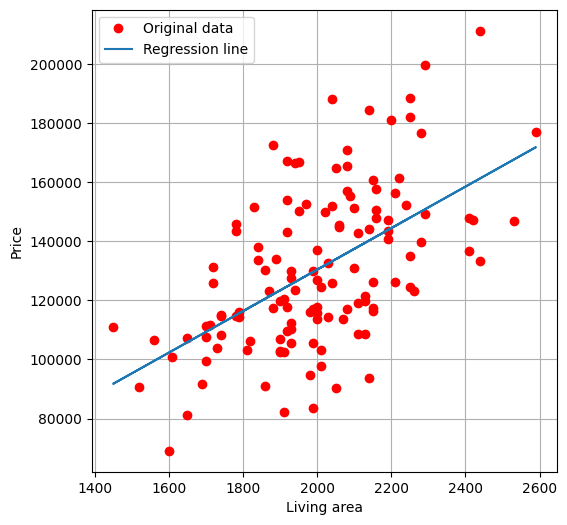

In [100]:
fig, ax2 = plt.subplots()
ax2.plot(X_kansas, y_kansas, 'ro', label='Original data')

line2, = ax2.plot(X_kansas, y_predicted, label='Regression line')

plt.ylabel('Price')
plt.xlabel('Living area')
ax2.legend()
plt.grid()
plt.show()

## Linear Regression on the Kansas City Dataset using Gradient Descent
Next, let's implement the iterative solution to linear regression using gradient descent.

For this, we will use sklearn's implementation.

sklearn already has an implementation for the approximate/iterative solution for finding the parameters/weights that minimizes the loss function. It does the following automatically:

1. Initialize the parameters/weight vector.

2. Calculate the cost/loss/objective function for current parameters/weights.

3. Compute for the gradients of the loss function with respect to the parameters/weights.

4. Implement gradient descent to update the paramters/weights.

Import the `SGDRegressor` class.

In [101]:
from sklearn.linear_model import SGDRegressor

Instantiate an `SGDRegressor` object. Set the following hyperparameters:
- Initial learning rate: 1-e9
- Maximum iterations: 200
- Penalty: None
- Learning rate: 'constant'
- Random state: 1
- Verbose: 1

See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn-linear-model-sgdregressor).

In [102]:
# Write your code here
sgd_regressor = SGDRegressor(
    eta0=1e-9,
    max_iter=200,
    penalty=None,
    learning_rate='constant',
    random_state=1,
    verbose=1
)

Call the `partial_fit()` function of the model to train it for 1 epoch.

In [104]:
# Write your code here
X_kansas_2d = X_kansas.reshape(-1, 1)
sgd_regressor.partial_fit(X_kansas_2d, y_kansas)

-- Epoch 1
Norm: 26.30, NNZs: 1, Bias: 0.012959, T: 128, Avg. loss: 5645644646.191728
Total training time: 0.00 seconds.


SGDRegressor(eta0=1e-09, learning_rate='constant', max_iter=200, penalty=None,
             random_state=1, verbose=1)

Get the predicted `y` values given the Kansas City dataset and using the `SGDRegressor` after 1 training epoch and assign the return value to variable `y_predicted`.

In [105]:
# Write your code here
y_predicted = sgd_regressor.predict(X_kansas_2d)

Display the regression line after 1 training epoch.

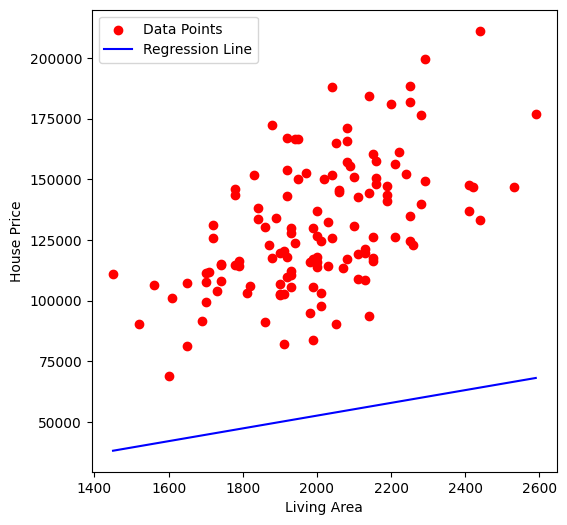

In [107]:
# Write your code here
intercept = sgd_regressor.intercept_
coefficient = sgd_regressor.coef_


plt.scatter(X_kansas_2d, y_kansas, color='red', label='Original Data')

x_values = np.linspace(min(X_kansas_2d), max(X_kansas_2d), 100)
y_values = intercept + coefficient * x_values

plt.plot(x_values, y_values, color='blue', label='Regression Line')

plt.xlabel('Living Area')
plt.ylabel('House Price')
plt.legend()
plt.show()

<span style="color:red;">**Question 1-13**: Describe the regression line with respect to the original data after 1 training epoch. </span>

Finish training the model by calling the `fit()` function of the model.

In [108]:
# Write your code here
sgd_regressor.fit(X_kansas_2d, y_kansas)

-- Epoch 1
Norm: 26.30, NNZs: 1, Bias: 0.012959, T: 128, Avg. loss: 5645644646.191728
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 42.02, NNZs: 1, Bias: 0.020711, T: 256, Avg. loss: 2171516472.595378
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 51.46, NNZs: 1, Bias: 0.025354, T: 384, Avg. loss: 930507073.946104
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 56.90, NNZs: 1, Bias: 0.028036, T: 512, Avg. loss: 492762623.621682
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 60.32, NNZs: 1, Bias: 0.029717, T: 640, Avg. loss: 336854622.041573
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 62.27, NNZs: 1, Bias: 0.030663, T: 768, Avg. loss: 281088732.254880
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 63.55, NNZs: 1, Bias: 0.031285, T: 896, Avg. loss: 260947418.306435
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 64.26, NNZs: 1, Bias: 0.031619, T: 1024, Avg. loss: 253791381.405200
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 64.66, NNZs: 1, Bias

SGDRegressor(eta0=1e-09, learning_rate='constant', max_iter=200, penalty=None,
             random_state=1, verbose=1)

Get the predicted `y` values given the Kansas City dataset and using the `SGDRegressor` after convergence and assign the return value to variable `y_predicted`.

In [109]:
# Write your code here
y_predicted = sgd_regressor.predict(X_kansas_2d)

Display the regression line after training.

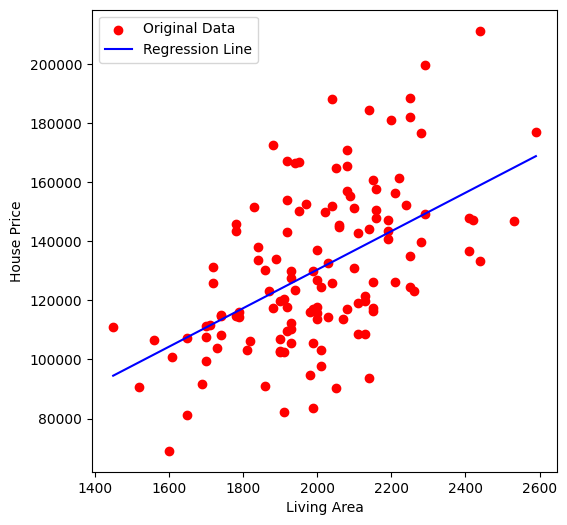

In [115]:
# Write your code here
intercept = sgd_regressor.intercept_
coefficient = sgd_regressor.coef_

plt.scatter(X_kansas_2d, y_kansas, color='red', label='Original Data')

x_values = np.linspace(min(X_kansas_2d), max(X_kansas_2d), 100)
y_values = intercept + coefficient * x_values

line3, = plt.plot(x_values, y_values, color='Blue', label='Regression Line')

plt.xlabel('Living Area')
plt.ylabel('House Price')
plt.legend()
plt.show()

<span style="color:red;">**Question 1-14:** Describe the regression line with respect to the original data after training.</span>

Let's display the graph of regression lines on the Kansas City dataset using analytical method, polyfit method, and gradient descent.

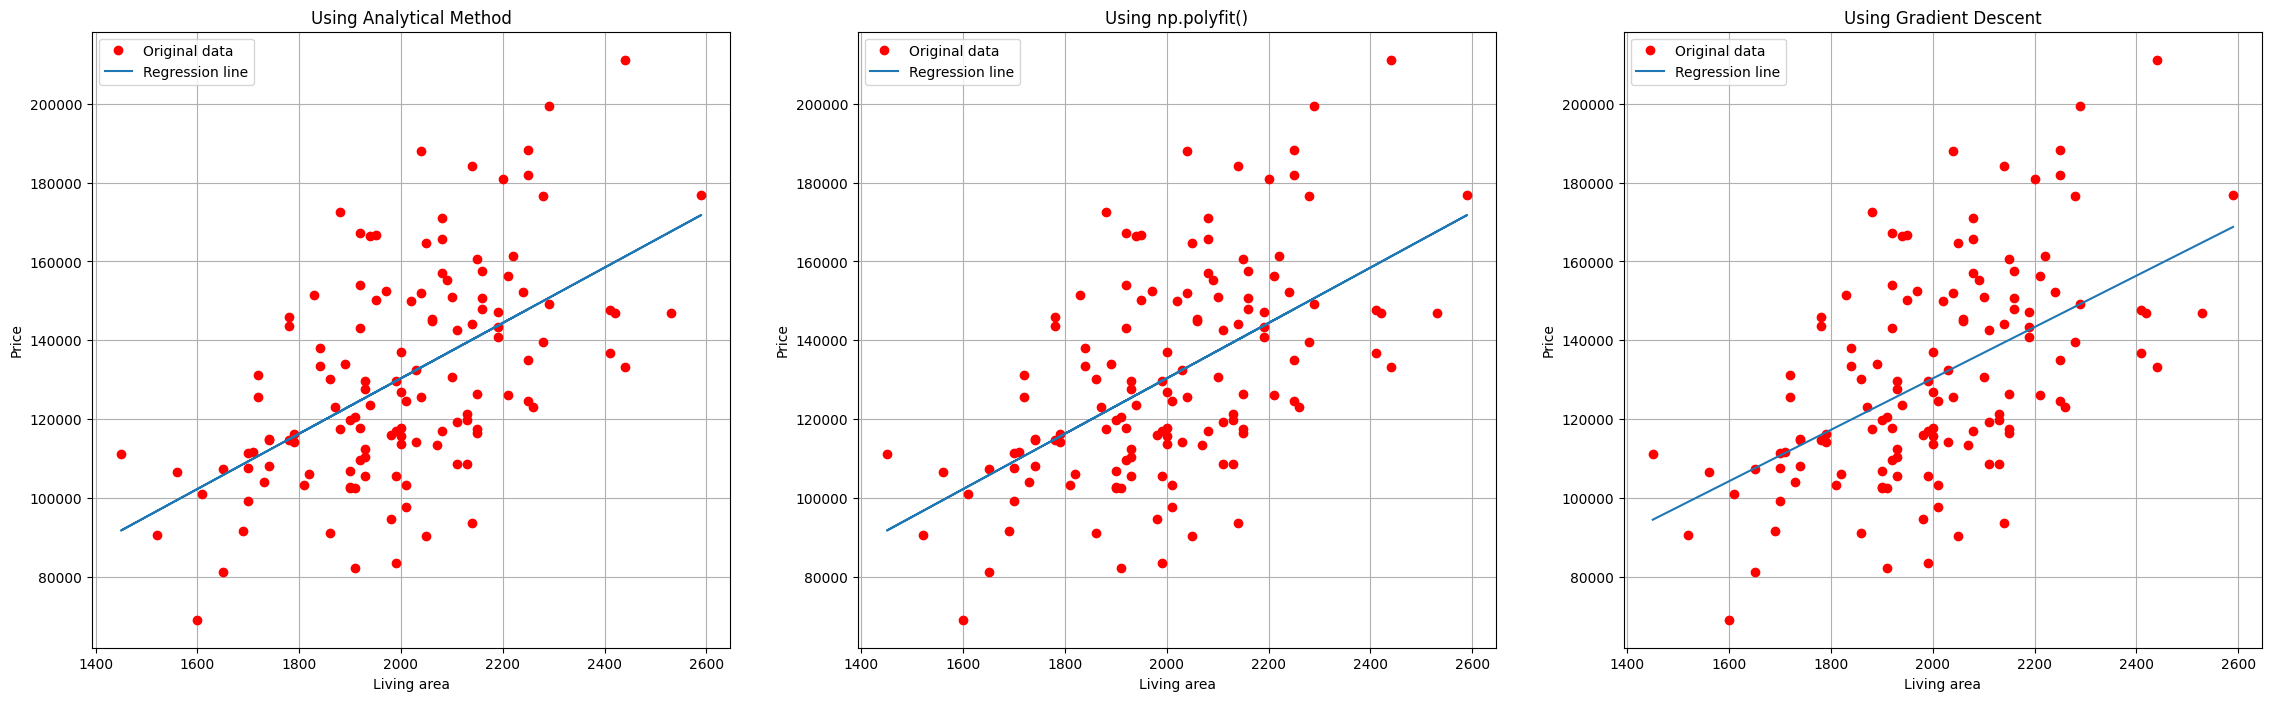

In [116]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(28, 8))

ax1.plot(X_kansas, y_kansas, 'ro', label='Original data')
ax1.plot(line1.get_xdata(), line1.get_ydata(), label='Regression line')
ax1.set_title('Using Analytical Method')
ax1.set_xlabel('Living area')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid()

ax2.plot(X_kansas, y_kansas, 'ro', label='Original data')
ax2.plot(line2.get_xdata(), line2.get_ydata(), label='Regression line')
ax2.set_title('Using np.polyfit()')
ax2.set_xlabel('Living area')
ax2.set_ylabel('Price')
ax2.legend()
ax2.grid()

ax3.plot(X_kansas, y_kansas, 'ro', label='Original data')
ax3.plot(line3.get_xdata(), line3.get_ydata(), label='Regression line')
ax3.set_title('Using Gradient Descent')
ax3.set_xlabel('Living area')
ax3.set_ylabel('Price')
ax3.legend()
ax3.grid()

<span style="color:green;">**Question**: Compare and describe the graphs of the analytical method, polyfit method, and gradient descent method. Are there differences in some of the graphs?</span>

Predict the price given a living area using the `predict()` function of the `AnalyticalMethod` class, the `PolyFitMethod` class, and the `SGDRegressor` class.

In [117]:
new_x = np.array([3105])

y_pred_analytical = analytical_method.predict(new_x)
y_pred_polyfit = polyfit_method.predict(new_x)
y_pred_gd = sgd_regressor.predict(np.expand_dims(new_x, 1))

print('Using Analytical method:\t', np.around(y_pred_analytical.flatten(), 2))
print('Using PolyFit method:\t\t', np.around(y_pred_polyfit, 2))
print('Using Gradient Descent:\t\t', np.around(y_pred_gd, 2))

Using Analytical method:	 [207961.59]
Using PolyFit method:		 [[207961.59]]
Using Gradient Descent:		 [202324.7]


<span style="color:red;">**Question 1-15**: Why did we get a different predicted price using the gradient descent method?</span>

### Conclusion
We successfully implemented a linear regression model on a house pricing dataset. We implemented two ways to train our model: via analytical solution and via mini-batch gradient descent.

We also tweaked our learning rate, and you can also continuously change the iteration count as long as you bring it back to the requested answer.

Also, remember that we are only using the analytical solution for small datasets. Do not use it on big datasets or it will take too long for your computer to process.

## <center>fin</center>

<!-- DO NOT MODIFY OR DELETE THIS -->
<sup>made/compiled by daniel stanley tan & courtney anne ngo 🐰 & thomas james tiam-lee</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> danieltan07@gmail.com & courtneyngo@gmail.com & thomasjamestiamlee@gmail.com</sup><br>
<sup>please cc your instructor, too</sup>
<!-- DO NOT MODIFY OR DELETE THIS -->